## Intro
* **Correlation** is a bi-variate analysis that measures the strength of association between two variables and the direction of the relationship. In terms of the strength of relationship, the value of the correlation coefficient varies between +1 and -1. A value of ± 1 indicates a perfect degree of association between the two variables.

Usually, in statistics, We measure four types of correlations
* [Pearson correlation(parametric)](https://towardsdatascience.com/pearson-coefficient-of-correlation-explained-369991d93404)
* [Kendall rank correlation(non-parametric)](https://towardsdatascience.com/kendall-rank-correlation-explained-dee01d99c535)
* Spearman correlation(non-parametric)
* Point-Biserial correlation  

**Pearson correlation(parametric) :**
1. Questions answers:
     * Is there a statistically significant relationship between age and height?
     * Is there a relationship between temperature and ice cream sales? 
     * Is there a relationship among job satisfaction, productivity, and income?
     * Which two variable have the strongest co-relation between age, height, weight, size of family and family income?
2. Assumptions
     * both variables should be **normally distributed**
     * There should be **no significant outliers**
     * Each variable should be **continuous** i.e. interval or ratios for example weight,age etc.
     * The two variables have a linear relationship.Otherwise need to run a non-parametric
     * The observations are **paired observations.**
     * **Homoscedascity**
     

**Kendall rank correlation(non-parametric) :**
Kendall rank correlation is used to test the similarities in the **ordering of data** when it is ranked by quantities.  Kendall’s correlation coefficient uses pairs of observations and determines the strength of association based on the patter on **concordance**(ordered in the same way) and discordance between the pairs.
1. Questions answers:
     * Correlation between a student’s exam grade (A, B, C…) and the time spent studying put in categories (<2 hours, 2–4 hours, 5–7 hours…)
     * Customer satisfaction (e.g. Very Satisfied, Somewhat Satisfied, Neutral…) and delivery time (< 30 Minutes, 30 minutes — 1 Hour, 1–2 Hours etc)

2. Assumptions
     * The variables are measured on an **ordinal** or **continuous** scale.
     * data appears to follow a **monotonic relationship** is **desirable**
     


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

## case 1: correlation analysis for simple non-linear function

In [2]:
# create a func y = 2x*x +1
def Createfunc(x):
    return 2*x*x +1

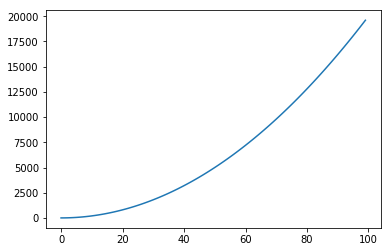

In [3]:
x = [i for i in range(100)]
y = [Createfunc(i) for i in x]
plt.plot(x,y)

In [9]:
data = pd.DataFrame({'x':x, 'y':y})

In [13]:
print(data.corr()) #pearson correlation for linear
print(data.corr(method='spearman'))
data.corr(method = 'kendall')

          x         y
x  1.000000  0.967644
y  0.967644  1.000000
     x    y
x  1.0  1.0
y  1.0  1.0


,x,y
x,1.0,1.0
y,1.0,1.0


## LinearRegression in sklearn
### case 2: simulating y =2*x+10

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [31]:
y = np.array([2*i +10 for i in x])
print(y)

x=np.array(x)
x.reshape(-1,1)

[ 10  12  14  16  18  20  22  24  26  28  30  32  34  36  38  40  42  44
  46  48  50  52  54  56  58  60  62  64  66  68  70  72  74  76  78  80
  82  84  86  88  90  92  94  96  98 100 102 104 106 108 110 112 114 116
 118 120 122 124 126 128 130 132 134 136 138 140 142 144 146 148 150 152
 154 156 158 160 162 164 166 168 170 172 174 176 178 180 182 184 186 188
 190 192 194 196 198 200 202 204 206 208]


array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53],
       [54],
       [55],
       [56],
       [57],
       [58],
       [59],
       [60],
       [61],
       [62],
       [63],
       [64],
       [65],
       [66],
       [67],
       [68],
       [69],
       [70],
       [71],
       [72],
       [73],
       [74],
       [75],
       [76],

In [34]:
lr = LinearRegression()
lr.fit(x.reshape(-1,1), y.reshape(-1,1))
lr.coef_, lr.intercept_

(array([[2.]]), array([10.]))

## Case 3: Diabetes

In [38]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [37]:
diabetes = load_diabetes()
data = diabetes.data
print(data.shape)

(442, 10)


In [39]:
ss = StandardScaler()
data = ss.fit_transform(data)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(data,diabetes.target,
                                                    test_size=0.3, random_state =2021)
len(X_train)

309

In [42]:
clf = LinearRegression()
clf.fit(X_train, y_train)
print(clf.coef_)

[  0.72704744 -10.3973271   25.93251922  12.54098949 -27.71447625
  15.09417423   2.30859485  10.25094354  31.19306098   3.04608689]


In [43]:
y_pred = clf.predict(X_test)
mean_squared_error(y_test, y_pred)

2562.2749989982985

In [46]:
# The score of the model
print(f'R squared:{clf.score(X_train, y_train)}')

R squared:0.5023650071475139


## Case 4: stock regression
* Using pandas.DataReader to read stocks in yahoo
    * each stock is a seperate file
    * merge the stocks that wants to compare into a data frame
    
* Using linear model to compare whether 2 stocks have linear regression relationship


In [4]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
import seaborn as sns
import datetime, os, warnings
from pandas_datareader.data import DataReader

ImportError: DLL load failed: 找不到指定的程序。

In [ ]:
warnings.filterwarnings('ignore')
# show the minus sigh
plt.rcParams['axes.unicode_minus'] = False
# set start,end time
start = datetime.datetime(2019, 1, 1)
end = datetime.datetime(2019,12, 31)

In [28]:
#define read stock data
def load_data():
    if os.path.exists('./Data/000001.csv'):
        data_ss = pd.read_csv('./Data/000001.csv')
        data_tlz = pd.read_csv('./Data/300005.csv')
    else:
        data_ss = DataReader("000001.SS", "yahoo",start,end)
        data_tlz = DataReader("000001.SZ", "yahoo",start,end)
        data_ss.to_csv('./Data/000001.csv')
        data_tlz.to_csv('./Data/300005.csv')
    return data_ss, data_tlz
data_ss, data_tlz = load_data()

In [33]:
print(data_ss.head())
data_tlz.head()

                   High          Low         Open        Close  Volume  \
Date                                                                     
2019-01-02  2500.278076  2456.423096  2497.881104  2465.291016  109900   
2019-01-03  2488.479004  2455.926025  2461.782959  2464.363037  124400   
2019-01-04  2515.315918  2440.906982  2446.019043  2514.867920  168900   
2019-01-07  2536.978027  2515.508057  2528.698975  2533.089111  177300   
2019-01-08  2531.344971  2520.165039  2530.300049  2526.461914  158100   

              Adj Close  
Date                     
2019-01-02  2465.291016  
2019-01-03  2464.363037  
2019-01-04  2514.867920  
2019-01-07  2533.089111  
2019-01-08  2526.461914  


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,9.42,9.16,9.39,9.19,53938632.0,9.019848
2019-01-03,9.33,9.15,9.18,9.28,41553795.0,9.108182
2019-01-04,9.82,9.22,9.24,9.75,148115906.0,9.569480
2019-01-07,9.85,9.63,9.84,9.74,86568766.0,9.559666
2019-01-08,9.74,9.62,9.73,9.66,40238811.0,9.481146


In [37]:
# use the both index(dates) as join key to join
stock =pd.merge(data_ss, data_tlz,left_index =True, right_index = True)[['Close_x','Close_y']]
stock.columns =['ShanghaiCompositeIndex','TanLuZhe']
stock.head()

,ShanghaiCompositeIndex,TanLuZhe
Date,,
2019-01-02,2465.291016,9.19
2019-01-03,2464.363037,9.28
2019-01-04,2514.867920,9.75
2019-01-07,2533.089111,9.74
2019-01-08,2526.461914,9.66


In [39]:
print(stock.diff().head())
stock.shift(1).head()

            ShanghaiCompositeIndex  TanLuZhe
Date                                        
2019-01-02                     NaN       NaN
2019-01-03               -0.927979      0.09
2019-01-04               50.504883      0.47
2019-01-07               18.221191     -0.01
2019-01-08               -6.627197     -0.08


,ShanghaiCompositeIndex,TanLuZhe
Date,,
2019-01-02,NaN,NaN
2019-01-03,2465.291016,9.19
2019-01-04,2464.363037,9.28
2019-01-07,2514.867920,9.75
2019-01-08,2533.089111,9.74


### explore the regression relationship

In [43]:
dailyReturn =(stock.diff()/stock.shift(periods=1)).dropna()
print(dailyReturn.head())
# whether having daily return >=0.1.It should not have accoording to current policy
dailyReturn[dailyReturn.TanLuZhe >=0.08]

            ShanghaiCompositeIndex  TanLuZhe
Date                                        
2019-01-03               -0.000376  0.009793
2019-01-04                0.020494  0.050647
2019-01-07                0.007245 -0.001026
2019-01-08               -0.002616 -0.008214
2019-01-09                0.007078  0.028985


,ShanghaiCompositeIndex,TanLuZhe
Date,,
2019-02-25,0.056007,0.087522


In [45]:
# using statsmodels package OLS -Ordinary Least Squares Regression
dailyReturn['Intercept'] = 1.0
model = sm.OLS(dailyReturn['TanLuZhe'], dailyReturn[['ShanghaiCompositeIndex','Intercept']])
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               TanLuZhe   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     251.3
Date:                Mon, 27 Dec 2021   Prob (F-statistic):           3.69e-39
Time:                        15:45:20   Log-Likelihood:                 687.99
No. Observations:                 241   AIC:                            -1372.
Df Residuals:                     239   BIC:                            -1365.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
ShanghaiCompositeIndex     1

In [49]:
# Use sklearn.linear_model
from sklearn.linear_model import LinearRegression

In [57]:
model = LinearRegression()
model.fit(np.array(dailyReturn['ShanghaiCompositeIndex']).reshape(-1,1),\
          np.array(dailyReturn['TanLuZhe']))
print(model.coef_, model.intercept_)

[1.24740867] 0.0014317967721214641


### Visulization

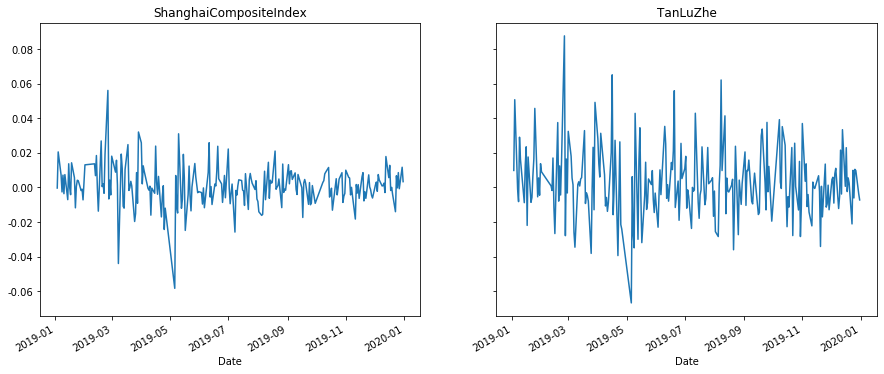

In [62]:
fig, ax = plt.subplots(nrows=1, ncols =2, figsize =(15,6),sharey= True)
dailyReturn['ShanghaiCompositeIndex'].plot(ax= ax[0])
ax[0].set_title('ShanghaiCompositeIndex')
dailyReturn['TanLuZhe'].plot(ax= ax[1])
ax[1].set_title('TanLuZhe')
plt.show()

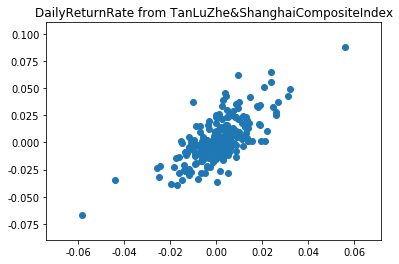

In [64]:
plt.scatter(dailyReturn['ShanghaiCompositeIndex'],dailyReturn['TanLuZhe'])
plt.title('DailyReturnRate from TanLuZhe&ShanghaiCompositeIndex')
plt.show()